In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [4]:
# load data
data  = pd.read_csv('heart+disease/processed.switzerland.data', sep=",",names=feature)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [6]:
data.shape

(123, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
age         123 non-null int64
sex         123 non-null int64
cp          123 non-null int64
trestbps    123 non-null object
chol        123 non-null int64
fbs         123 non-null object
restecg     123 non-null object
thalach     123 non-null object
exang       123 non-null object
oldpeak     123 non-null object
slope       123 non-null object
ca          123 non-null object
thal        123 non-null object
target      123 non-null int64
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [8]:
data = data.replace({'?':np.NaN})

In [9]:
del data['fbs']
del data['ca']
del data['thal']

In [10]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 122
Data columns (total 11 columns):
age         105 non-null int64
sex         105 non-null int64
cp          105 non-null int64
trestbps    105 non-null object
chol        105 non-null int64
restecg     105 non-null object
thalach     105 non-null object
exang       105 non-null object
oldpeak     105 non-null object
slope       105 non-null object
target      105 non-null int64
dtypes: int64(5), object(6)
memory usage: 9.8+ KB


In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['trestbps']= label_encoder.fit_transform(data['trestbps'])
data['oldpeak']= label_encoder.fit_transform(data['oldpeak'])
data['slope']= label_encoder.fit_transform(data['slope'])
data['restecg']= label_encoder.fit_transform(data['restecg'])
data['thalach']= label_encoder.fit_transform(data['thalach'])
data['exang']= label_encoder.fit_transform(data['exang'])

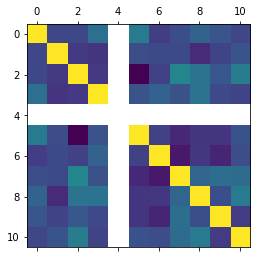

In [13]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [14]:
# changing attack labels to their respective attack class
def change_label(df):
  df.target.replace([1,2,3,4],1,inplace=True)

In [15]:
change_label(data)

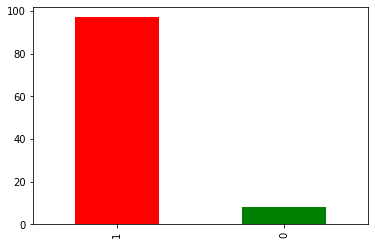

In [16]:
data.target.value_counts().plot(kind='bar',color=['red','green']);

In [17]:
data.to_csv('switzerkand_processed.csv')

In [18]:
X = data.drop(["target"],axis =1)
y = data["target"]

In [19]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
from imblearn.metrics import specificity_score, sensitivity_score

In [21]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [22]:
X_train.shape

(94, 10)

In [23]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    spec.append(round(e,3))
    sens.append(round(f,3))

In [67]:
ML_Model1 = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
spec1 = []
sens1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))
    f1score1.append(round(d, 3))
    spec1.append(round(e,3))
    sens1.append(round(f,3))

# Modelling

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_spec = specificity_score(y_pred, y_test,average='weighted')
knn_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [68]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_spec,knn_sens)

# Linear SVC

In [25]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0, tol=1e-5)
lsvc.fit(X_train, y_train)

y_pred    = lsvc.predict(X_test)

lsvc_acc = accuracy_score(y_pred, y_test)
lsvc_prec = precision_score(y_pred, y_test,average='weighted')
lsvc_rec = recall_score(y_pred, y_test,average='weighted')
lsvc_f1 = f1_score(y_pred, y_test,average='weighted')
lsvc_spec = specificity_score(y_pred, y_test,average='weighted')
lsvc_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [69]:
storeResults('LinearSVC',lsvc_acc,lsvc_prec,lsvc_rec,lsvc_f1,lsvc_spec,lsvc_sens)

# Gaussian Process

In [26]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gp = GaussianProcessClassifier(kernel=kernel,random_state=0)
gp.fit(X_train, y_train)

y_pred    = gp.predict(X_test)

gp_acc = accuracy_score(y_pred, y_test)
gp_prec = precision_score(y_pred, y_test,average='weighted')
gp_rec = recall_score(y_pred, y_test,average='weighted')
gp_f1 = f1_score(y_pred, y_test,average='weighted')
gp_spec = specificity_score(y_pred, y_test,average='weighted')
gp_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [70]:
storeResults('Guassian Process',gp_acc,gp_prec,gp_rec,gp_f1,gp_spec,gp_sens)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1000)

tree.fit(X_train, y_train)

y_pred    = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')
dt_spec = specificity_score(y_pred, y_test,average='weighted')
dt_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [71]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1,dt_spec,dt_sens)

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred    = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_pred, y_test,average='weighted')
nb_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [72]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_sens)

# QDA

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred    = qda.predict(X_test)

qda_acc = accuracy_score(y_pred, y_test)
qda_prec = precision_score(y_pred, y_test,average='weighted')
qda_rec = recall_score(y_pred, y_test,average='weighted')
qda_f1 = f1_score(y_pred, y_test,average='weighted')
qda_spec = specificity_score(y_pred, y_test,average='weighted')
qda_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [73]:
storeResults('QDA',qda_acc,qda_prec,qda_rec,qda_f1,qda_spec,qda_sens)

# AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

ab.fit(X_train, y_train)

y_pred    = ab.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test,average='weighted')
ab_rec = recall_score(y_pred, y_test,average='weighted')
ab_f1 = f1_score(y_pred, y_test,average='weighted')
ab_spec = specificity_score(y_pred, y_test,average='weighted')
ab_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [74]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1,ab_spec,ab_sens)

# Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bg_acc = accuracy_score(y_pred, y_test)
bg_prec = precision_score(y_pred, y_test,average='weighted')
bg_rec = recall_score(y_pred, y_test,average='weighted')
bg_f1 = f1_score(y_pred, y_test,average='weighted')
bg_spec = specificity_score(y_pred, y_test,average='weighted')
bg_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [75]:
storeResults('Bagging',bg_acc,bg_prec,bg_rec,bg_f1,bg_spec,bg_sens)

# Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bos_acc = accuracy_score(y_pred, y_test)
bos_prec = precision_score(y_pred, y_test,average='weighted')
bos_rec = recall_score(y_pred, y_test,average='weighted')
bos_f1 = f1_score(y_pred, y_test,average='weighted')
bos_spec = specificity_score(y_pred, y_test,average='weighted')
bos_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [76]:
storeResults('Boosting',bos_acc,bos_prec,bos_rec,bos_f1,bos_spec,bos_sens)

# Stacking Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('dt', DecisionTreeClassifier())]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred    = clf.predict(X_test)
stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_pred, y_test,average='weighted')
stac_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [103]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_sens)

# Voting Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = DecisionTreeClassifier(random_state=50)
clf2 = RandomForestClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train,y_train)
y_pred    = clf.predict(X_test)
vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [104]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_sens)

# DNN

In [36]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [37]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# 3 Layers

In [38]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 29s 29ms/step - loss: 0.6595 - accuracy: 0.9327 - val_loss: 0.3621 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8967 - val_loss: 0.2466 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.9261 - val_loss: 0.2510 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8900 - val_loss: 0.2453 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8870 - val_loss: 0.2374 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9613 - val_loss: 0.2370 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.9204 - val_loss: 0.2590 - val_accuracy: 0.9474
Epoch 8/100

Epoch 59/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1643 - accuracy: 0.9376 - val_loss: 0.2505 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2634 - accuracy: 0.9335 - val_loss: 0.2217 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9423 - val_loss: 0.2127 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9137 - val_loss: 0.2353 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1207 - accuracy: 0.9771 - val_loss: 0.2229 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.9224 - val_loss: 0.2245 - val_accuracy: 0.9474
Epoch 65/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9386 - val_loss: 0.2208 - val_accuracy: 0.9474
Epoch 

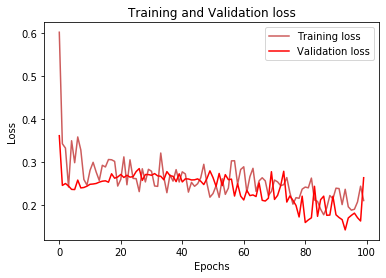

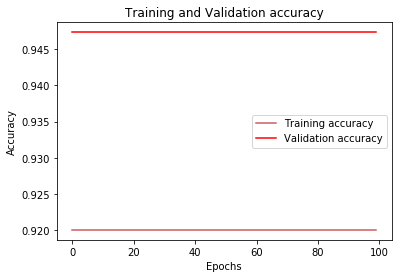

In [40]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

In [42]:
dnn_3_acc = accuracy_score(y_pred, y_test)
dnn_3_prec = precision_score(y_pred, y_test,average='weighted')
dnn_3_rec = recall_score(y_pred, y_test,average='weighted')
dnn_3_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_3_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_3_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [77]:
storeResults1('DNN - 3 Layers',dnn_3_acc,dnn_3_prec,dnn_3_rec,dnn_3_f1,dnn_3_spec,dnn_3_sens)

# 4 Layers

In [43]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 4s 26ms/step - loss: 0.6744 - accuracy: 0.7719 - val_loss: 0.3263 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.9352 - val_loss: 0.2344 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.8940 - val_loss: 0.2548 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.9305 - val_loss: 0.2412 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9438 - val_loss: 0.2439 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8635 - val_loss: 0.2617 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9528 - val_loss: 0.2557 - val_accuracy: 0.9474
Epoch 8/100


Epoch 59/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.9365 - val_loss: 0.2233 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2407 - accuracy: 0.9060 - val_loss: 0.2832 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.9083 - val_loss: 0.3005 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9302 - val_loss: 0.2839 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2959 - accuracy: 0.8755 - val_loss: 0.3400 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.9331 - val_loss: 0.2533 - val_accuracy: 0.9474
Epoch 65/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1867 - accuracy: 0.9299 - val_loss: 0.3087 - val_accuracy: 0.9474
Epoch 

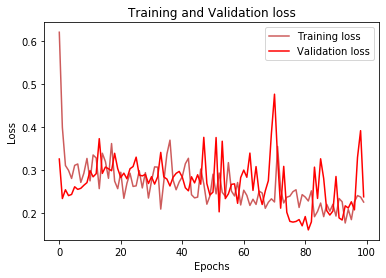

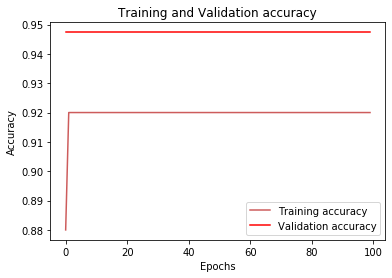

In [45]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_4_acc = accuracy_score(y_pred, y_test)
dnn_4_prec = precision_score(y_pred, y_test,average='weighted')
dnn_4_rec = recall_score(y_pred, y_test,average='weighted')
dnn_4_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_4_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_4_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [78]:
storeResults1('DNN - 4 Layers',dnn_4_acc,dnn_4_prec,dnn_4_rec,dnn_4_f1,dnn_4_spec,dnn_4_sens)

# 5 Layers

In [47]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 9s 47ms/step - loss: 0.6866 - accuracy: 0.8918 - val_loss: 0.5860 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.9393 - val_loss: 0.2833 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2259 - accuracy: 0.9516 - val_loss: 0.2411 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.9442 - val_loss: 0.2423 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.9211 - val_loss: 0.2496 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.9208 - val_loss: 0.2479 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3274 - accuracy: 0.9021 - val_loss: 0.2929 - val_accuracy: 0.9474
Epoch 8/100


38/38 [==============================] - 0s 4ms/step - loss: 0.1759 - accuracy: 0.9397 - val_loss: 0.2118 - val_accuracy: 0.9474
Epoch 59/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.9070 - val_loss: 0.2321 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2389 - accuracy: 0.8985 - val_loss: 0.3137 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1409 - accuracy: 0.9507 - val_loss: 0.2640 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2675 - accuracy: 0.8786 - val_loss: 0.3502 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2320 - accuracy: 0.9461 - val_loss: 0.2145 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1239 - accuracy: 0.9790 - val_loss: 0.1922 - val_accuracy: 0.9474
Epoch 65/100
38/38 

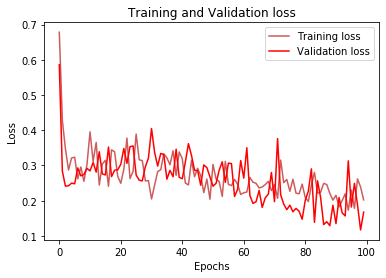

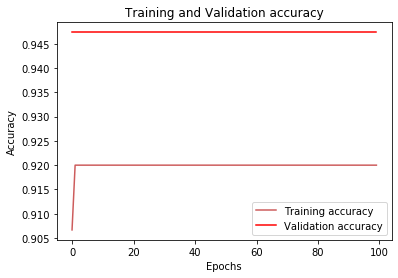

In [49]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_5_acc = accuracy_score(y_pred, y_test)
dnn_5_prec = precision_score(y_pred, y_test,average='weighted')
dnn_5_rec = recall_score(y_pred, y_test,average='weighted')
dnn_5_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_5_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_5_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [79]:
storeResults1('DNN - 5 Layers',dnn_5_acc,dnn_5_prec,dnn_5_rec,dnn_5_f1,dnn_5_spec,dnn_5_sens)

# 6 Layers

In [51]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 8s 39ms/step - loss: 0.6872 - accuracy: 0.9378 - val_loss: 0.6145 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.9398 - val_loss: 0.3642 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7069 - accuracy: 0.8778 - val_loss: 0.2383 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9140 - val_loss: 0.3136 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9495 - val_loss: 0.2520 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3386 - accuracy: 0.9199 - val_loss: 0.2510 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.9317 - val_loss: 0.2543 - val_accuracy: 0.9474
Epoch 8/100


Epoch 59/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1546 - accuracy: 0.9396 - val_loss: 0.2992 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3341 - accuracy: 0.8956 - val_loss: 0.2748 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2378 - accuracy: 0.9254 - val_loss: 0.1919 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1757 - accuracy: 0.9608 - val_loss: 0.1876 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2510 - accuracy: 0.9477 - val_loss: 0.1956 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2204 - accuracy: 0.9478 - val_loss: 0.2128 - val_accuracy: 0.9474
Epoch 65/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3875 - accuracy: 0.8689 - val_loss: 0.3048 - val_accuracy: 0.9474
Epoch 

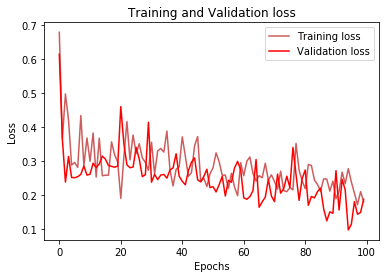

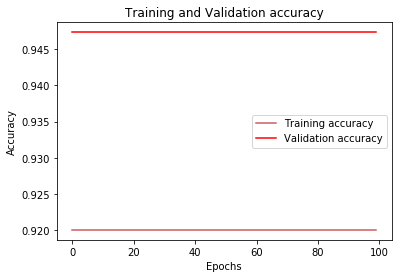

In [53]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_6_acc = accuracy_score(y_pred, y_test)
dnn_6_prec = precision_score(y_pred, y_test,average='weighted')
dnn_6_rec = recall_score(y_pred, y_test,average='weighted')
dnn_6_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_6_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_6_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [80]:
storeResults1('DNN - 6 Layers',dnn_6_acc,dnn_6_prec,dnn_6_rec,dnn_6_f1,dnn_6_spec,dnn_6_sens)

# 7 Layers

In [55]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 10s 68ms/step - loss: 0.6887 - accuracy: 0.8789 - val_loss: 0.6720 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6622 - accuracy: 0.9320 - val_loss: 0.4572 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.9008 - val_loss: 0.4318 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3829 - accuracy: 0.9254 - val_loss: 0.2320 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3075 - accuracy: 0.9306 - val_loss: 0.2614 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5227 - accuracy: 0.9302 - val_loss: 0.2677 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.9458 - val_loss: 0.2556 - val_accuracy: 0.9474
Epoch 8/100

Epoch 59/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9180 - val_loss: 0.2496 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.8948 - val_loss: 0.2023 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.9556 - val_loss: 0.2212 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.9469 - val_loss: 0.2415 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2816 - accuracy: 0.9245 - val_loss: 0.2944 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.8925 - val_loss: 0.2122 - val_accuracy: 0.9474
Epoch 65/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.8607 - val_loss: 0.2688 - val_accuracy: 0.9474
Epoch 

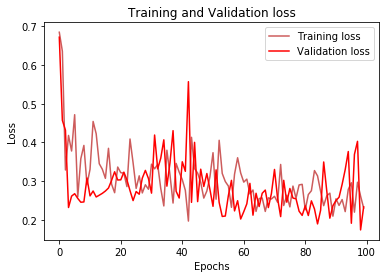

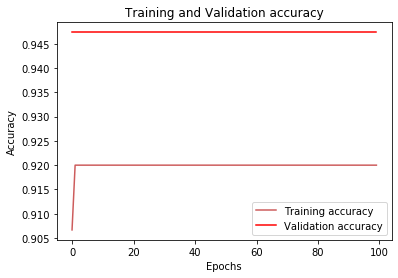

In [57]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_7_acc = accuracy_score(y_pred, y_test)
dnn_7_prec = precision_score(y_pred, y_test,average='weighted')
dnn_7_rec = recall_score(y_pred, y_test,average='weighted')
dnn_7_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_7_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_7_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [81]:
storeResults1('DNN - 7 Layers',dnn_7_acc,dnn_7_prec,dnn_7_rec,dnn_7_f1,dnn_7_spec,dnn_7_sens)

# 8 Layers

In [59]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 14s 66ms/step - loss: 0.6890 - accuracy: 0.8561 - val_loss: 0.6738 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.9259 - val_loss: 0.6207 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.9277 - val_loss: 0.4547 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 1.0074 - accuracy: 0.9037 - val_loss: 0.2308 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.4318 - accuracy: 0.9317 - val_loss: 0.2417 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3282 - accuracy: 0.9573 - val_loss: 0.2425 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.9432 - val_loss: 0.2398 - val_accuracy: 0.9474
Epoch 8/100

Epoch 59/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3439 - accuracy: 0.8917 - val_loss: 0.3181 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9403 - val_loss: 0.2925 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2779 - accuracy: 0.9351 - val_loss: 0.2335 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.91 - 0s 5ms/step - loss: 0.2627 - accuracy: 0.9125 - val_loss: 0.3267 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8862 - val_loss: 0.2996 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.8617 - val_loss: 0.3041 - val_accuracy: 0.9474
Epoch 65/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2548 - accuracy: 0.9433 - val_

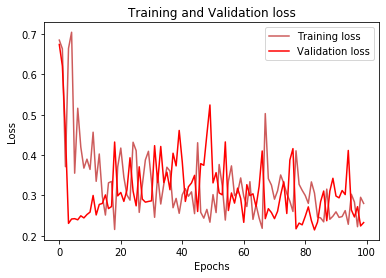

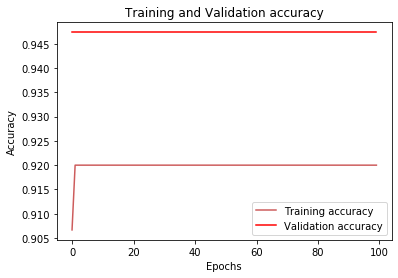

In [61]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_8_acc = accuracy_score(y_pred, y_test)
dnn_8_prec = precision_score(y_pred, y_test,average='weighted')
dnn_8_rec = recall_score(y_pred, y_test,average='weighted')
dnn_8_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_8_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_8_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [82]:
storeResults1('DNN - 8 Layers',dnn_8_acc,dnn_8_prec,dnn_8_rec,dnn_8_f1,dnn_8_spec,dnn_8_sens)

# 9 Layers

In [63]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [64]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 11s 63ms/step - loss: 0.6889 - accuracy: 0.8502 - val_loss: 0.6741 - val_accuracy: 0.9474
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.9548 - val_loss: 0.6455 - val_accuracy: 0.9474
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.6375 - accuracy: 0.9189 - val_loss: 0.5904 - val_accuracy: 0.9474
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5167 - accuracy: 0.9264 - val_loss: 0.9336 - val_accuracy: 0.9474
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.8349 - accuracy: 0.9195 - val_loss: 0.9369 - val_accuracy: 0.9474
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.9214 - val_loss: 0.2577 - val_accuracy: 0.9474
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3052 - accuracy: 0.9034 - val_loss: 0.2614 - val_accuracy: 0.9474
Epoch 8/100

Epoch 59/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2062 - accuracy: 0.9571 - val_loss: 0.3316 - val_accuracy: 0.9474
Epoch 60/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9404 - val_loss: 0.2889 - val_accuracy: 0.9474
Epoch 61/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2820 - accuracy: 0.9214 - val_loss: 0.3402 - val_accuracy: 0.9474
Epoch 62/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2634 - accuracy: 0.9264 - val_loss: 0.3605 - val_accuracy: 0.9474
Epoch 63/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2886 - accuracy: 0.9117 - val_loss: 0.2980 - val_accuracy: 0.9474
Epoch 64/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2600 - accuracy: 0.9455 - val_loss: 0.2607 - val_accuracy: 0.9474
Epoch 65/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2470 - accuracy: 0.9561 - val_loss: 0.2651 - val_accuracy: 0.9474
Epoch 

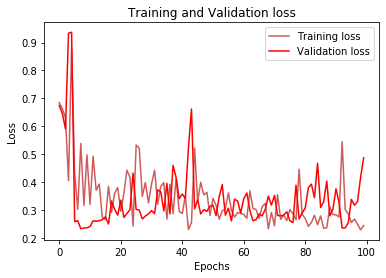

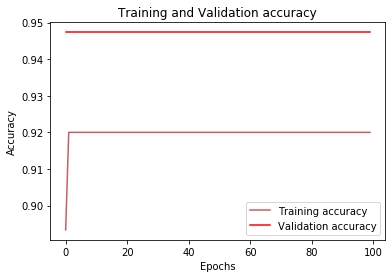

In [65]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_9_acc = accuracy_score(y_pred, y_test)
dnn_9_prec = precision_score(y_pred, y_test,average='weighted')
dnn_9_rec = recall_score(y_pred, y_test,average='weighted')
dnn_9_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_9_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_9_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [83]:
storeResults1('DNN - 9 Layers',dnn_9_acc,dnn_9_prec,dnn_9_rec,dnn_9_f1,dnn_9_spec,dnn_9_sens)

# Comparison

In [114]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                      }) 

In [115]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,Specificity,Sensitivity
0,KNN,0.909,1.000,0.909,0.952,0.000,0.909
1,LinearSVC,0.818,0.818,0.818,0.818,0.082,0.818
2,Guassian Process,0.909,1.000,0.909,0.952,0.000,0.909
3,Decision Tree,0.727,0.655,0.727,0.689,0.162,0.727
4,Naive Bayes,0.455,0.782,0.455,0.367,0.688,0.455
5,QDA,0.909,1.000,0.909,0.952,0.000,0.909
6,AdaBoost,0.818,0.818,0.818,0.818,0.082,0.818
7,Bagging,0.636,0.509,0.636,0.566,0.239,0.636
8,Boosting,0.818,0.818,0.818,0.818,0.082,0.818
9,Stacking Classifier,0.876,0.884,0.876,0.880,0.195,0.876


In [107]:
#creating dataframe
result1 = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                       'Precision': precision1,
                       'Recall'   : recall1, 
                       'F1_score' : f1score1,
                       'Specificity' : spec1,
                       'Sensitivity' : sens1
                      }) 

In [108]:
result1

,ML Model,Accuracy,Precision,Recall,F1_score,Specificity,Sensitivity
0,DNN - 3 Layers,0.909,1.0,0.909,0.952,0.0,0.909
1,DNN - 4 Layers,0.909,1.0,0.909,0.952,0.0,0.909
2,DNN - 5 Layers,0.909,1.0,0.909,0.952,0.0,0.909
3,DNN - 6 Layers,0.909,1.0,0.909,0.952,0.0,0.909
4,DNN - 7 Layers,0.909,1.0,0.909,0.952,0.0,0.909
5,DNN - 8 Layers,0.909,1.0,0.909,0.952,0.0,0.909
6,DNN - 9 Layers,0.909,1.0,0.909,0.952,0.0,0.909


# Graph

# ML

In [109]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

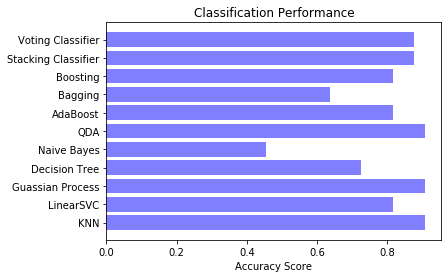

In [110]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

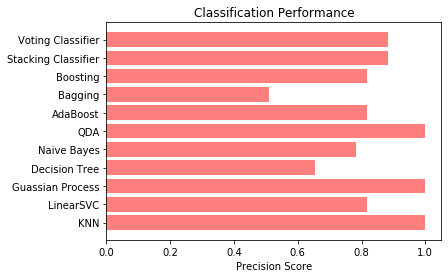

In [111]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

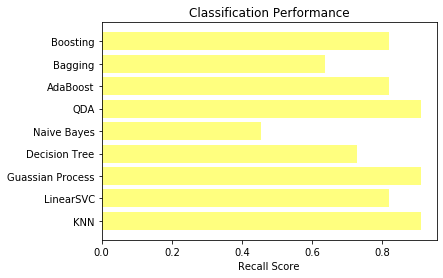

In [92]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

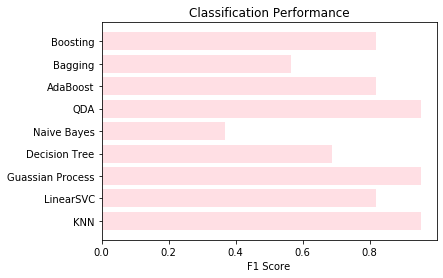

In [93]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

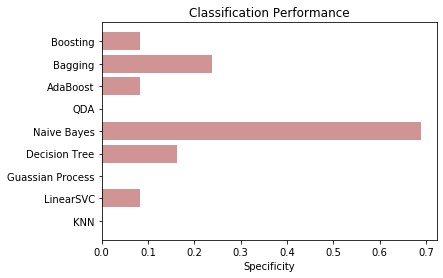

In [94]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

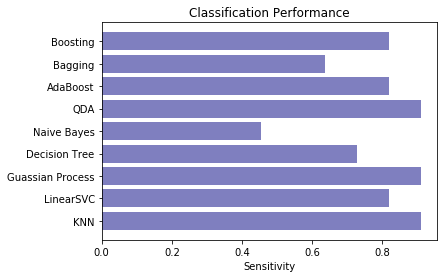

In [95]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

# DL

In [96]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

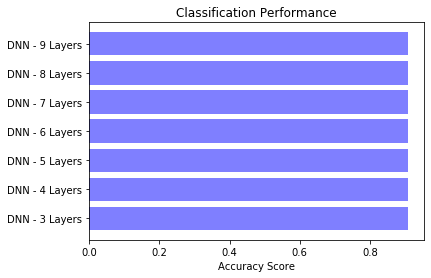

In [97]:
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

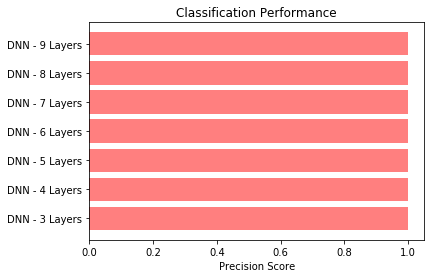

In [98]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

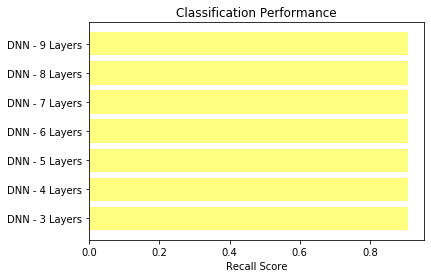

In [99]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

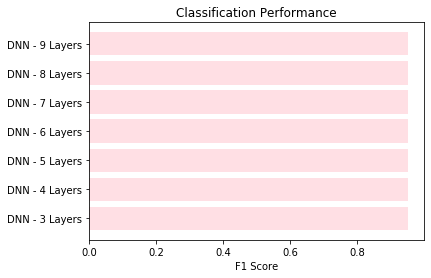

In [100]:
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

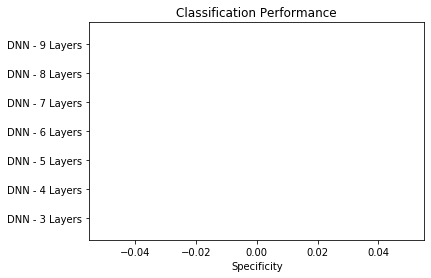

In [101]:
plt2.barh(y_pos, spec1, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

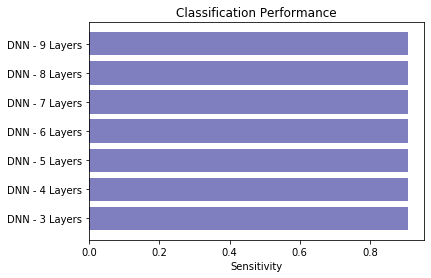

In [102]:
plt2.barh(y_pos, sens1, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()